In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import subprocess
from scipy.special import expit
import torch
import seaborn as sns
sns.set_style('white')

['loss_history_train', 'loss_history_val', 'state_dict', 'epoch', 'best_loss', 'optimizer']


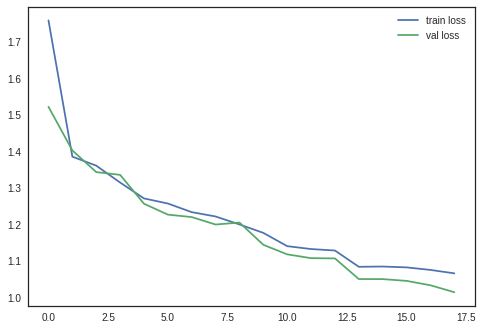

In [2]:
model = 'model_best.pth.tar'
model = 'checkpoint.pth.tar'
with open(model) as f:
    a = torch.load(model)
print a.keys()
loss_history_train = a['loss_history_train']
loss_history_val = a['loss_history_val']
loss_train = np.matrix(loss_history_train).mean(axis = 1)
loss_val = np.matrix(loss_history_val).mean(axis = 1)
del a
plt.plot(loss_train, label = 'train loss')
plt.plot(loss_val, label = 'val loss')
plt.legend()
# plt.ylim([0.3,2])
plt.show()

In [37]:
model = '../protest-model.pth.tar'

In [4]:
df_test = pd.read_csv('~/Dropbox/annot_test.txt', delimiter= '\t')
df_test.columns.tolist()

['fname',
 'protest',
 'violence',
 'sign',
 'photo',
 'fire',
 'police',
 'children',
 'group_20',
 'group_100',
 'flag',
 'night',
 'shouting']

In [39]:
command = "python pred.py \
            --img_dir /home/dhwon/data_hdd2/UCLA-protest/img/test/ \
            --output_csvpath temp.csv --model {model} --batch_size 4 --cuda".format(model = model)
# command = "python pred.py --img_dir /home/dhwon/data_hdd2/UCLA-protest/img/test/ --output_csvpath temp.csv --model ../protest-model.pth.tar --batch_size 8 --cuda"
# command = "python pred.py --img_dir /home/dhwon/data_hdd2/UCLA-protest/img/test/ --output_csvpath temp.csv --model tmp.pth.tar --batch_size 8 --cuda"
# print command
!{command}

*** loading the model from ../protest-model.pth.tar***
*** calculating the model outputs of the images in /home/dhwon/data_hdd2/UCLA-protest/img/test/***
100%|██████████████████████████████████████| 8153/8153 [00:56<00:00, 143.10it/s]


In [40]:
# checkpoint.pth.tar
# model_best.pth.tar

In [41]:
df_pred = pd.read_csv('temp.csv')
df_pred['imgpath'] = [os.path.basename(fname) for fname in df_pred['imgpath']]

In [42]:
# df_pred['protest'] = expit(df_pred['protest'])
# df_pred.iloc[:,3:] = expit(df_pred.iloc[:,3:])# plt.scatter(df_test['protest'], df_pred['protest'])

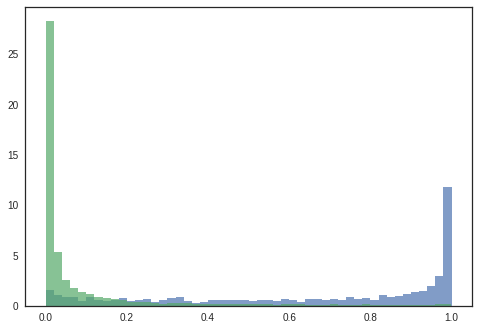

In [43]:

x1 = df_pred[df_test['protest'] == 1]['protest']
x2 = df_pred[df_test['protest'] == 0]['protest']
plt.hist(x1, alpha = 0.7, bins = 50, normed=True)
plt.hist(x2, alpha = 0.7, bins = 50, normed=True)
# plt.yscale('log')
# plt.ylim([0,1])
plt.show()

In [44]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

0.926880156441
0.864712375813


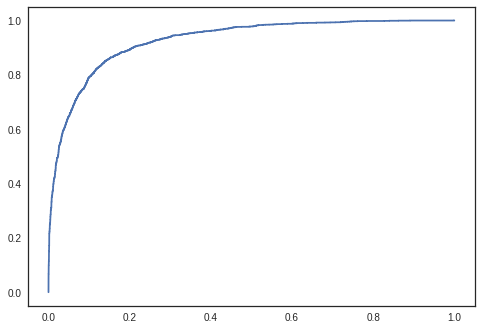

In [45]:
print roc_auc_score(df_test['protest'], df_pred['protest'])
print accuracy_score(df_test['protest'], (df_pred['protest'] >= 0.5).astype(int))
fpr, tpr, _ = roc_curve(df_test['protest'], df_pred['protest'])
plt.plot(fpr, tpr)
plt.show()

sign
roc auc : 0.880
acc     : 0.856


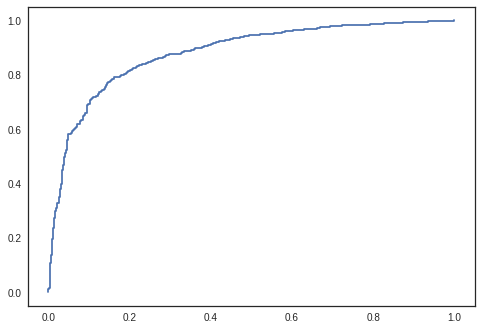


photo
roc auc : 0.680
acc     : 0.971


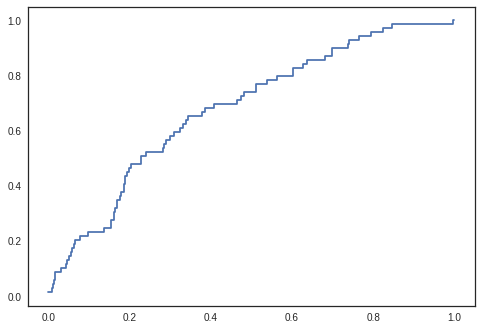


fire
roc auc : 0.945
acc     : 0.950


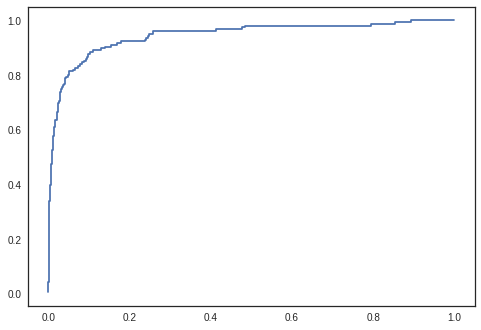


police
roc auc : 0.868
acc     : 0.931


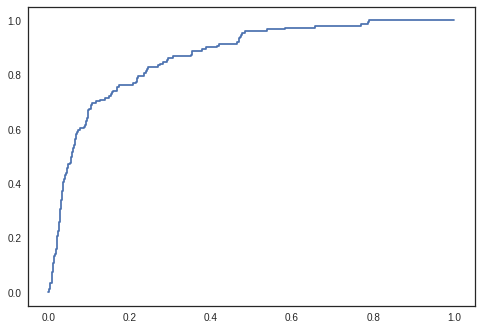


children
roc auc : 0.671
acc     : 0.968


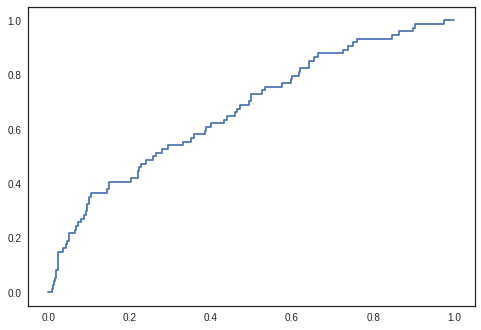


group_20
roc auc : 0.766
acc     : 0.752


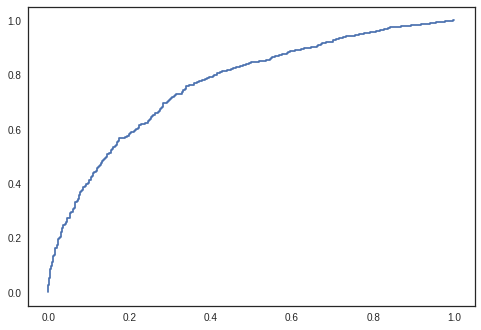


group_100
roc auc : 0.801
acc     : 0.782


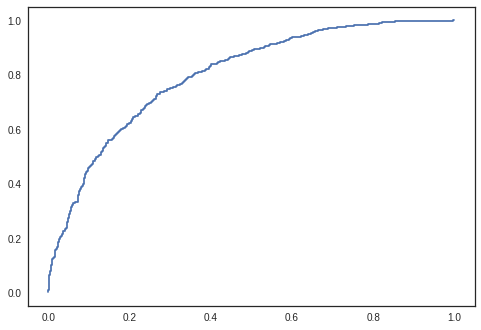


flag
roc auc : 0.720
acc     : 0.918


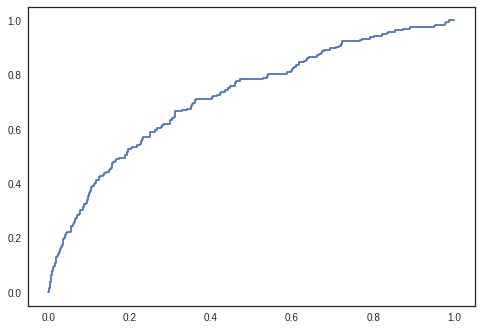


night
roc auc : 0.900
acc     : 0.930


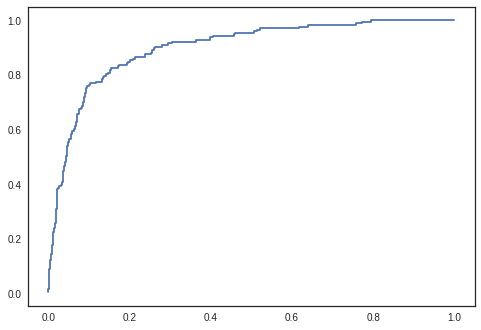


shouting
roc auc : 0.661
acc     : 0.953


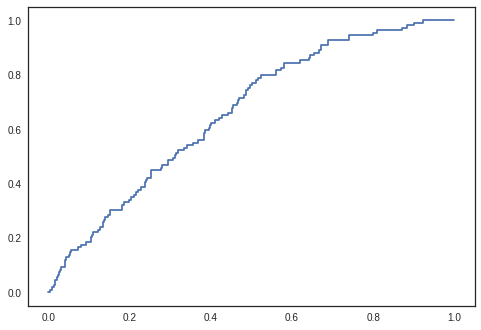

In [46]:
for col in df_pred.columns[3:]:
    pred = df_pred[df_test['protest'] == 1][col].tolist()
    target = df_test[df_test['protest'] == 1][col].astype(int).tolist()
    fpr, tpr, _ = roc_curve(target, pred)
    print col
    print 'roc auc : %.3f'%roc_auc_score(target, pred)
    print 'acc     : %.3f'%accuracy_score(target, (np.array(pred) > 0.5).astype(int))
    plt.plot(fpr, tpr)
    plt.show()
    print

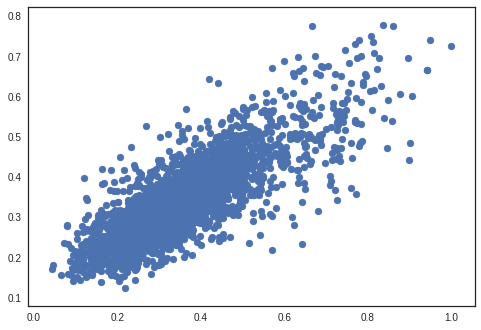

(0.80890469676539023, 0.0)


In [47]:
import scipy.stats as stats
col = 'violence'
pred = df_pred[df_test['protest'] == 1][col].tolist()
target = df_test[df_test['protest'] == 1][col].astype(float).tolist()
plt.scatter(target, pred)
plt.show()
print stats.pearsonr(target, pred)

In [48]:
len(df_test.columns)

13

In [35]:
np.mean(((np.array(pred) - np.array(target)) ** 2)) 

0.0084937772315920486

In [36]:
a = df_pred[df_test['protest'] == 1].iloc[:,3:].as_matrix().round()
b = df_test[df_test['protest'] == 1].iloc[:,3:].astype(float).as_matrix()
(a==b).mean()

0.89778062313273577